In [16]:
%pip install -q matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import http.client
import json
import matplotlib.pyplot as plt
from datetime import datetime

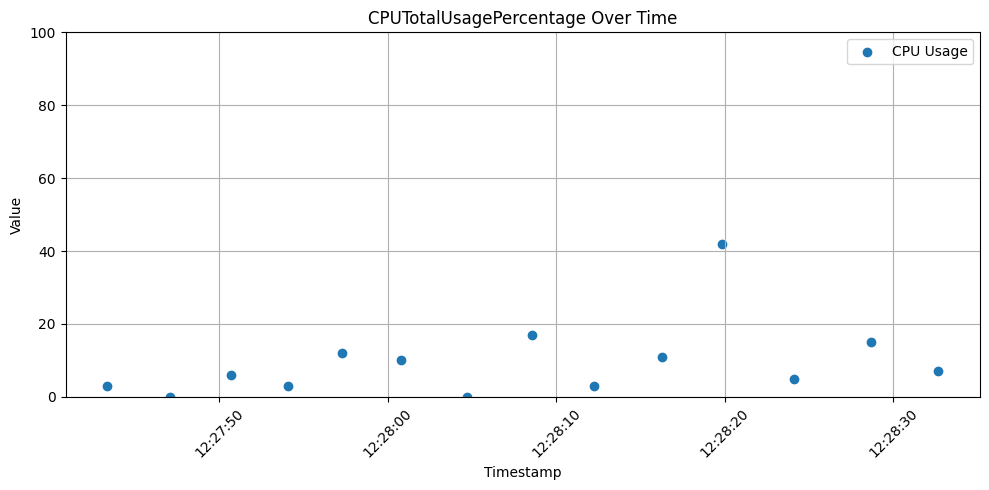

In [21]:
# Fetch data from the server
conn = http.client.HTTPConnection("127.0.0.1", 8000)
conn.request("GET", "/counter/CPUTotalUsagePercentage")
response = conn.getresponse()
data = response.read().decode()
conn.close()

# Convert data to a Python dictionary
data_dict = json.loads(data)

# Extract timestamps and values
timestamps = [datetime.fromtimestamp(item['timestamp']) for item in data_dict]
values = [item['value'] for item in data_dict]

# Plot the timeseries graph
plt.figure(figsize=(10, 5))
plt.scatter(timestamps, values, marker='o', label="CPU Usage")
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('CPUTotalUsagePercentage Over Time')
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

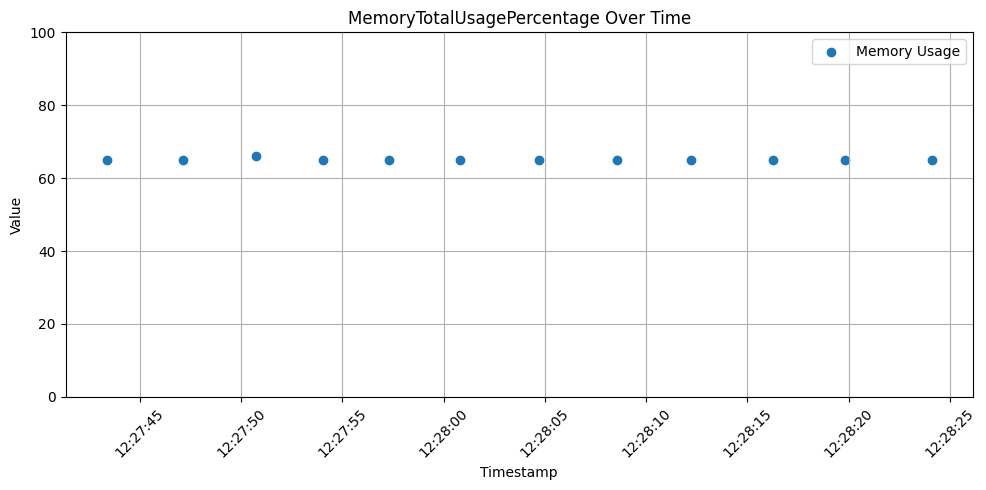

In [20]:
# Fetch data from the server
conn = http.client.HTTPConnection("127.0.0.1", 8000)
conn.request("GET", "/counter/MemoryTotalUsagePercentage")
response = conn.getresponse()
data = response.read().decode()
conn.close()

# Convert data to a Python dictionary
data_dict = json.loads(data)

# Extract timestamps and values
timestamps = [datetime.fromtimestamp(item['timestamp']) for item in data_dict]
values = [item['value'] for item in data_dict]

# Plot the timeseries graph
plt.figure(figsize=(10, 5))
plt.scatter(timestamps, values, marker='o', label="Memory Usage")
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('MemoryTotalUsagePercentage Over Time')
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()